In [1]:
#importaciones
from IPython.display import HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import _converter
plt.subplots(figsize=(15,4))
%matplotlib inline 
plt.style.use('default')
import datetime
import math
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
df_gen_edad = pd.read_csv("../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", parse_dates=['fechanacimiento'])
df_postulaciones = pd.read_csv("../datos_navent_fiuba/fiuba_4_postulaciones.csv", parse_dates=['fechapostulacion'])
df_avisos_detalle = pd.read_csv("../datos_navent_fiuba/fiuba_6_avisos_detalle.csv")

In [3]:
# limpieza de fechas invalidas
df_gen_edad["fechanacimiento"] = pd.to_datetime(df_gen_edad["fechanacimiento"], errors="coerce")

def calc_edad(x):    
    if (pd.isnull(x)):
        return -1
    return math.floor((datetime.datetime.today()-x).days / 365)

# calculo edad para cada postulante
df_gen_edad["edad"] = df_gen_edad["fechanacimiento"].apply(calc_edad)
df_gen_edad = df_gen_edad.loc[(0 <= df_gen_edad['edad']) & (df_gen_edad['edad'] <= 80)]

In [4]:
df_aviso_post_edad = df_gen_edad[['idpostulante', 'edad']].merge(df_postulaciones[['idpostulante','idaviso']], on='idpostulante')\
                                                          .merge(df_avisos_detalle[['idaviso', 'nivel_laboral']], on='idaviso')\

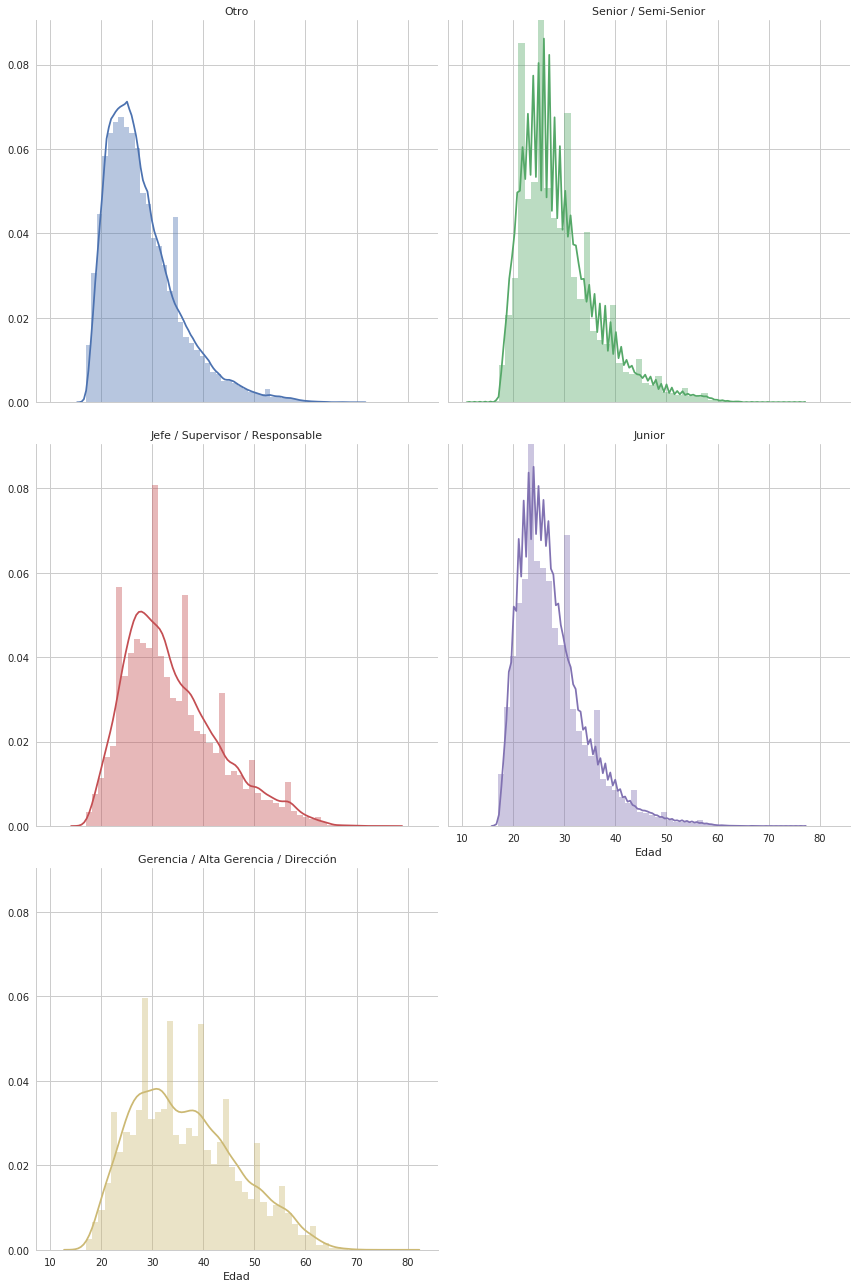

In [7]:
niveles = df_avisos_detalle['nivel_laboral'].unique()
colores = sns.color_palette("hls", len(niveles))
hues = {}
for i, n in enumerate(niveles):
    hues[n] = colores
    
g = sns.FacetGrid(df_aviso_post_edad, col="nivel_laboral", hue="nivel_laboral", col_wrap=2, size=6)
g.map(sns.distplot, "edad")
g.set_titles("{col_name}")
g.set_axis_labels("Edad")